<h2 style='color:purple' align='center'>Seperating Chemicals</h2>

<br>

### 1. Importing libraries and their associated methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>

### 2. Loading the Dataset

In [2]:
chemical_X_train_df = pd.read_csv("./Training Data/Logistic_X_Train.csv")
chemical_Y_train_df = pd.read_csv("./Training Data/Logistic_Y_Train.csv")

In [3]:
chemical_X_train_df.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
chemical_Y_train_df.head()

,label
0,1
1,1
2,1
3,0
4,0


<br>

### 3. Cleaning and Normalising the Data

In [5]:
chemical_X_train_df.isnull().values.any()

False

In [6]:
chemical_Y_train_df.isnull().values.any()

False

In [7]:
# Converting this DataFrame into Numpy Array

chemical_X_train = chemical_X_train_df.values
chemical_Y_train = chemical_Y_train_df.values

In [8]:
chemical_X_train.shape

(3000, 3)

In [9]:
chemical_Y_train.shape

(3000, 1)

In [10]:
# Normalising the Data

chemical_X_train_mean = chemical_X_train.mean(axis = 0)
chemical_X_train_std = chemical_X_train.std(axis = 0)

chemical_X_train = (chemical_X_train - chemical_X_train_mean) / chemical_X_train_std

In [11]:
chemical_X_train

array([[-0.93471307, -0.24439694, -0.46140414],
       [-0.7823013 , -0.19327286, -1.08586573],
       [-0.46707053,  0.56681072, -1.17534766],
       ...,
       [ 0.06059095,  0.62470809, -1.83827342],
       [ 1.13777964, -0.13681202,  1.22033571],
       [-0.74013008, -0.42526137, -1.29728616]])

<br>

### 4. Data Visulisation

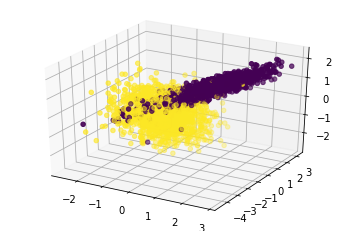

In [12]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x_points = chemical_X_train[:, 0]
y_points = chemical_X_train[:, 1]
z_points = chemical_X_train[:, 2]
ax.scatter(x_points, y_points, z_points, c=chemical_Y_train)

plt.show()

<br>

### 5. Dividing the Data into Training and Testing Data

In [13]:
chemical_X_test_df = pd.read_csv("./Test Cases/Logistic_X_Test.csv")
chemical_X_test_df.head()

,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [14]:
chemical_X_test = chemical_X_test_df.values

In [15]:
chemical_X_test = (chemical_X_test - chemical_X_train_mean) / chemical_X_train_std

In [16]:
chemical_X_test

array([[-0.58096727, -1.23196981, -2.10386172],
       [-0.93642077,  0.43931113, -0.36596031],
       [ 1.43773502,  0.91090225,  1.08581064],
       ...,
       [-0.89542577, -0.05073748, -0.67463414],
       [-0.40465638,  0.8263143 , -0.84593545],
       [ 0.39940977, -0.40861529,  0.29533219]])

<br>

### 6. Applying Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(chemical_X_train, chemical_Y_train.ravel())

LogisticRegression()

In [20]:
# Training Score

model.score(chemical_X_train, chemical_Y_train) * 100

99.53333333333333

In [21]:
chemical_Y_predict = model.predict(chemical_X_test)

In [22]:
#chemical_Y_predict

In [23]:
chemical_Y_pred_df = pd.DataFrame(chemical_Y_predict, columns=["label"])

In [24]:
chemical_Y_pred_df.head()

,label
0,1
1,1
2,0
3,1
4,1


In [25]:
chemical_Y_pred_df.to_csv("Logistic_Y_prediction.csv", index=False)